## Step 1 – Import Libraries & Create Synthetic Data
We generate 365 daily temperatures (°C) using a normal distribution.

In [1]:
import numpy as np

np.random.seed(42)  # reproducibility

# Generate temperatures: mean=28°C, std=5°C, 365 days
temperatures = np.random.normal(loc=28, scale=5, size=365)
temperatures = np.round(temperatures, 1)  # round to 1 decimal place

print("Sample temperatures for first 10 days:", temperatures[:10])

Sample temperatures for first 10 days: [30.5 27.3 31.2 35.6 26.8 26.8 35.9 31.8 25.7 30.7]


## Step 2 – Reshape Data into Months
We assume 30 days per month for simplicity.

In [2]:
temps_monthly = temperatures[:360].reshape(12, 30)
print("Data shape (months × days):", temps_monthly.shape)
print("First month sample data:", temps_monthly[0])

Data shape (months × days): (12, 30)
First month sample data: [30.5 27.3 31.2 35.6 26.8 26.8 35.9 31.8 25.7 30.7 25.7 25.7 29.2 18.4
 19.4 25.2 22.9 29.6 23.5 20.9 35.3 26.9 28.3 20.9 25.3 28.6 22.2 29.9
 25.  26.5]


## Step 3 – Monthly Statistics
We calculate average, maximum, and minimum temperatures for each month.

In [3]:
monthly_avg = np.mean(temps_monthly, axis=1)
monthly_max = np.max(temps_monthly, axis=1)
monthly_min = np.min(temps_monthly, axis=1)

print("Monthly Average Temperatures:", monthly_avg)
print("Monthly Max Temperatures:", monthly_max)
print("Monthly Min Temperatures:", monthly_min)

Monthly Average Temperatures: [27.05666667 27.40333333 28.07       27.89666667 27.52333333 29.39666667
 28.33666667 28.23666667 27.28       28.53       29.40666667 26.97666667]
Monthly Max Temperatures: [35.9 37.3 35.8 40.3 39.  41.6 47.3 39.6 38.6 38.7 38.5 35.4]
Monthly Min Temperatures: [18.4 18.2 14.9 18.4 20.  22.  20.4 17.9 11.8 18.2 21.9 20.8]


## Step 4 – Hottest & Coldest Days

In [4]:
hottest_day = np.max(temperatures)
coldest_day = np.min(temperatures)

print("🔥 Hottest day temperature:", hottest_day, "°C")
print("❄️ Coldest day temperature:", coldest_day, "°C")

🔥 Hottest day temperature: 47.3 °C
❄️ Coldest day temperature: 11.8 °C


## Step 5 – Detect Heatwave Days
A heatwave is defined as a day with temperature ≥ 35°C.

In [5]:
heatwave_days = temperatures[temperatures >= 35]
print("Number of heatwave days:", heatwave_days.size)
print("Heatwave temperatures:", heatwave_days)

Number of heatwave days: 28
Heatwave temperatures: [35.6 35.9 35.3 37.3 35.7 35.8 35.4 37.4 40.3 35.  39.  35.7 37.3 37.5
 35.3 41.6 47.3 39.6 38.7 36.8 38.6 36.2 35.2 35.9 38.7 38.5 35.4 35.7]


## Step 6 – Seasonal Trend Analysis
We split the year into 4 seasons (~90 days each) and calculate averages.

In [6]:
seasons = temperatures[:360].reshape(4, 90)
season_avg = np.mean(seasons, axis=1)

print("Seasonal Average Temperatures:", season_avg)

Seasonal Average Temperatures: [27.51       28.27222222 27.95111111 28.30444444]


## Step 7 – Visualization with Matplotlib
We create a line chart for daily temperatures and a bar chart for monthly averages.

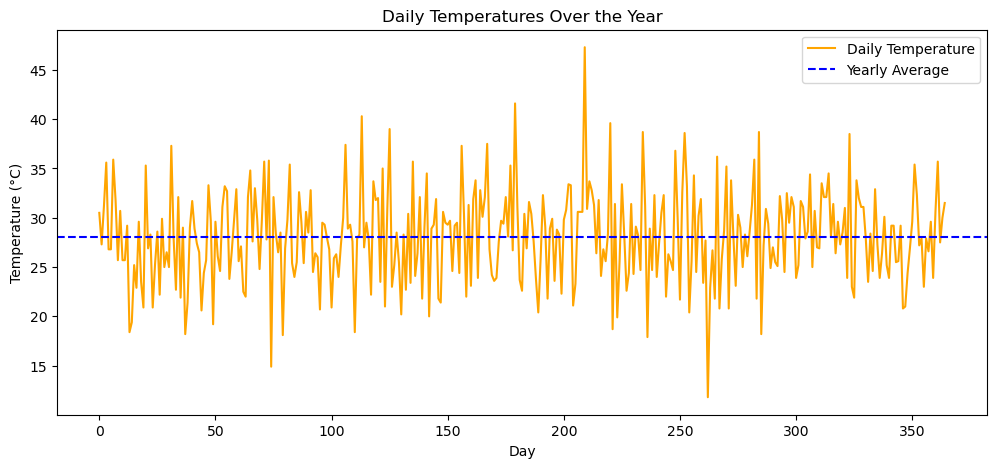

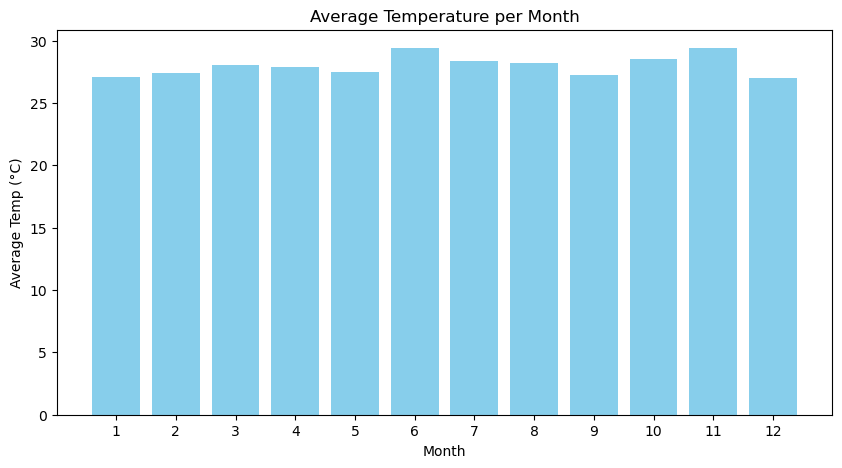

In [7]:
import matplotlib.pyplot as plt

# Daily temperatures
plt.figure(figsize=(12, 5))
plt.plot(temperatures, color='orange', label="Daily Temperature")
plt.axhline(y=np.mean(temperatures), color='blue', linestyle='--', label="Yearly Average")
plt.title("Daily Temperatures Over the Year")
plt.xlabel("Day")
plt.ylabel("Temperature (°C)")
plt.legend()
plt.show()

# Monthly averages
plt.figure(figsize=(10, 5))
months = np.arange(1, 13)
plt.bar(months, monthly_avg, color='skyblue')
plt.title("Average Temperature per Month")
plt.xlabel("Month")
plt.ylabel("Average Temp (°C)")
plt.xticks(months)
plt.show()